# Машинное обучение

## Факультет математики НИУ ВШЭ

### 2019-2020 учебный год

Лектор: Илья Щуров

Семинаристы: Соня Дымченко, Руслан Хайдуров

# Семинар 4

Сегодня мы узнаем

* Как использовать kNN для задачи классификации.
* Что такое кросс-валидация и какой она бывает.
* Что такое «проклятие размерности» и почему kNN не является самым лучшим алгоритмом машинного обучения
* Почему утверждение о том, что «точность больше 90%» не говорит ничего
* Как работать с категориальными данными

**Теорема**. Если $f(x)=E[Y\mid X=x]$ является непрерывной функцией от $x$, при некоторых дополнительных условиях, k-NN-регрессия даёт состоятельную оценку для $f(x)$ при $k, N \to \infty$, т.ч. $k/N\to 0$.

**Основная идея:** если данных очень много, то можно выбрать такое большое $k$, которое было бы при этом мало по сравнению с $N$. При этом $k$ ближайших соседей для точки $x_{new}$ будут лежать очень близко к ней, и, за счёт того, что $k$ большое, k-NN оценка будет достаточно близкой к истинному матожиданию $f(x_{new})$.

## Разложение ожидаемой ошибки на шум, смещение и разброс


<img src="https://qph.fs.quoracdn.net/main-qimg-a222c081325070d06d64966c68359283-c" width="360" align="center">

Почему нас так интересует смещённость и разброс предсказаний? Оказывается, они определяют, насколько сильно будет ошибаться алгоритм. Пусть $(x_{data}, y_{data})$ — обучающая выборка, $(x_{new}, y_{new})$ — новая точка, полученная из того же распределения $(X, Y)$, $a(x_{data}, y_{data})$, алгоритм, обученный на данной выборке, $a(x_{data}, y_{data})(x_{new})$ — его предсказание в точке $x_{new}$. На следующей лекции мы докажем, что ожидаемую среднеквадратичную ошибку предсказания для произвольной точки $x_{new}$ можно разложить на три компоненты следующим образом:

\begin{align}
\mathbb E[(a(x_{data}, y_{data})(x_{new})-y_{new})^2]  = & \mathbb E[(y_{new}-\mathbb E[y_{new}])^2] +\\
(&\mathbb E[a(x_{data}, y_{data})(x_{new})]-\mathbb E[y_{new}])^2+\\
& \mathbb E[(a(x_{data}, y_{data})(x_{new}) - \mathbb E[a(x_{data}, y_{data})(x_{new})])^2].
\end{align}

Во всех матожиданиях $y_{new}$ выбирается из условного  распределения $Y\mid X=x_{new}$.

Первое слагаемое называется «*шумом*» (noise). Оно показывает, насколько сильно ответы $y_{new}$ отличаются от своих средних значений («идеальных предсказаний»). Мы не могли бы сделать ожидаемую ошибку меньше шума, даже если бы знали истинное распределение $(X, Y)$.

Второе слагаемое — это *смещение* (bias) нашей оценки. Оно показывает, насколько сильно средний ответ алгоритма (усреднение происходит по разным обучающим выборкам) отличается от «идеального предсказания» $\mathbb E[Y \mid X=x_{new}]$.

Наконец, третье слагаемое называется *разбросом*. Это дисперсия предсказания. Она показывает, насколько разные мы можем получать предсказания при обучении алгоритма на разных выборках, взятых из одного и того же распределения. Иными словами, оно показывает, насколько чувствителен наш алгоритм к данным.

**Вопрос.** В соответствии с результатами, полученными ранее, что вы можете сказать о выборе оптимального $k$ для k-NN? Правда ли, что $k$ нужно делать как можно больше, чтобы уменьшить разброс предсказаний? Правда ли, что $k$ нужно делать как можно меньше, чтобы уменьшить смещение предсказаний?

### kNN для задачи классификации
Напишите функцию `kNN_classifier(x_train, y_train, x_new, k=1)` по аналогии с `kNN_regression`. Вместо взятие среднего нужно выбрать значение $y$, которое встречается среди $k$ ближайших соседей чаще всего. (Подсказка: оно называется *модой*.)

In [0]:
def kNN_classifier(x_train, y_train, x_new, k=1):
    # YOUR CODE HERE
    pass

## Эксперименты с реальными данными

Теперь рассмотрим как работает уже готовый классификатор из scikit-learn на примере датасета с разными видами стекла.

Подробнее о датасете тут: [kaggle_dataset_link](https://www.kaggle.com/uciml/glass)

In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("./glass.csv")
print("Размерность данных: {}\n".format(data.shape))
data.head()

Размерность данных: (214, 10)



,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
data.Type.unique()

array([1, 2, 3, 5, 6, 7])

Посмотрим на распределения признаков по разным классам;

Рассмотрим для начала небольшую подвыборку признаков просто для удобства отрисовки.

In [ ]:
! pip install seaborn # just in case...

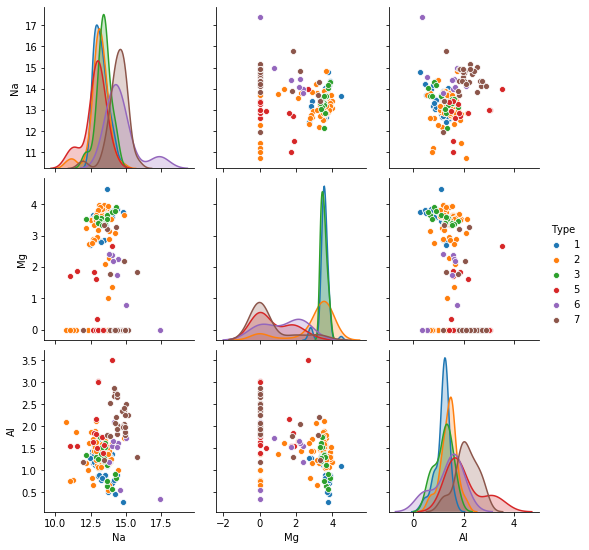

In [7]:
import seaborn as sns
%matplotlib inline

sns.pairplot(data.iloc[:, [1,2,3,-1]], hue='Type')

NameError: name 'KNeighborsClassifier' is not defined

In [ ]:
new_data = pd.DataFrame([[1.5, 12.3, 4.2, 1.3, 72.7, 0.57, 7.4, 0, 0]])
# числа написаны произвольным образом
knn.predict(new_data)

Как можно проверить, насколько хорошо алгоритм работает? Если бы у нас была возможность получить новые данные (с ответами), мы могли бы попросить наш алгоритм сделать предсказания на них и сравнить результаты с ответами. Однако, новые данные взять неоткуда. Можно попросить алгоритм предсказать ответ на каких-нибудь данных, на которых он и обучался.

**Вопрос.** При каком $k$ метод kNN будет лучше всего предсказывать ответы для тех элементов, на которых он обучался? Какой результат получится? Обязательно ли это свидетельствует о качестве нашего алгоритма?

Как видимо, проверять работу обученного алгоритма на тех данных, на которых он обучался, не имеет смысла. Как же быть? На помощь приходит кросс-валидация. 

## Кросс-валидация (Скользящий контроль)

**Терминология**
<img src="http://www.vias.org/tmdatanaleng/img/hl_crossval.png" width="400" align="center">

**Оценкой скользящего контроля** называется средняя по всем разбиениям величина ошибки на контрольных подвыборках.

Если выборка независима, то средняя ошибка скользящего контроля даёт несмещённую оценку вероятности ошибки.

Выделяют следующие виды скользящего контроля

* *Контроль на отложенных данных* (**hold-out CV**)
    - Оценка производится по одному случайному разбиению 
* *Контроль по отдельным объектам* (**leave-one-out CV**)
    - Поочередно из выборки убирается один объект, модель обучется на оставшейся выборке и делает предсказание на отложенном объекте.
* *Контроль по $q$ блокам (**q-fold CV**)*
    - Выборка случайным образом разбивается на $q$ непересекающихся блоков одинаковой (или почти одинаковой) длины.
* *Контроль по $r×q$ блокам (**r×q-fold CV**)*
    - Контроль по $q$ блокам (q-fold CV) повторяется $r$ раз. Каждый раз выборка случайным образом разбивается на $q$ непересекающихся блоков. Этот способ наследует все преимущества $q$-fold CV, при этом появляется дополнительная возможность увеличивать число разбиений.

Подробнее про каждый из них и про доверительные интервалы для оценок результатов кросс-валидации можно почитать [здесь](http://www.machinelearning.ru/wiki/index.php?title=Скользящий_контроль).

Еще один важный термин

**Стратификация** заключается в том, чтобы заранее поделить выборку на части (страты), и при разбиении на обучение длины $m$ и контроль длины $k$ гарантировать, что каждая страта будет поделена между обучением и контролем в той же пропорции $m:k$.

**Стратификация классов в задачах классификации** означает, что каждый класс (который и определяет страту) делится между обучением и контролем в пропорции $m:k$, где $m$ — размер обучающей выборки, а $k$ — размер тестовой выборки при данном варианте разбиения.
Стратификация позволяет уменьшить разброс оценок скользящего контроля и сузить доверительные интервалы для них.

## Sklearn

scikit-learn (aka sklearn) -- библиотка, в которой реализовано множество алгоритмов машинного обучения, в том числе kNN, линейные модели, решающие деревья, градиентный бустинг и даже нейронные сети, а также множество способов предобработки и представления данных. В дальнейшем в курсе это будет фактически наш основной инструмент для ML.

In [47]:
from sklearn.model_selection import (train_test_split, StratifiedKFold, KFold, cross_val_score)
from sklearn.neighbors import KNeighborsClassifier

# выделим обучающую выборку
X, y = data.iloc[:, :-1].values, data.Type
# создадим классификатор
knn = KNeighborsClassifier(n_neighbors=3)
# функция .fit запускает обучение kNN
knn.fit(X, y)
# можно сделать предсказания для неизвестных ранее объектов
new_data = pd.DataFrame([[1.5, 12.3, 4.2, 1.3, 72.7, 0.57, 7.4, 0, 0]])
knn.predict(new_data)

# стратификация согласно разметке по классам
# деление датасета на обучение и тест один раз
# это и есть hold-out CV
# как правило при таком подходе k-fold cv производится отдельно над train частью датасета
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, 
                                                    random_state=42, 
                                                    stratify=data.Type)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [40]:
y_pred = knn.predict(X_test)

In [41]:
y_pred

array([7, 7, 1, 7, 2, 2, 7, 2, 2, 7, 1, 3, 1, 6, 2, 2, 1, 7, 5, 7, 1, 5,
       7, 1, 1, 3, 6, 1, 2, 7, 1, 7, 5, 1, 3, 2, 2, 1, 1, 2, 2, 1, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 7, 2, 2, 2, 2,
       2, 1, 2, 1, 1])

In [42]:
y_test

196    7
206    7
148    3
172    5
84     2
      ..
122    2
66     1
76     2
21     1
26     1
Name: Type, Length: 71, dtype: int64

Будем измерять качество на тестовой выборке при помощи доли правильных ответов.

In [43]:
(y_pred == y_test).mean()

0.6901408450704225

Или то же самое при помощи sklearn.

In [44]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.6901408450704225

В sklearn есть также реализация q-fold cross-validation

In [48]:
kfold_iterator = StratifiedKFold(n_splits=3, random_state=1)

for train_index, test_index in kfold_iterator.split(X,y):
    print("TRAIN:", train_index[:5], "TEST:", test_index[:5])
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # YOUR CODE: обучите kNN на выбранных обучающих данных
    # и посчитайте метрики на тестовых

TRAIN: [24 25 26 27 28] TEST: [0 1 2 3 4]
TRAIN: [0 1 2 3 4] TEST: [24 25 26 27 28]
TRAIN: [0 1 2 3 4] TEST: [47 48 49 50 51]


## Исследуем KNN из коробки

KNN имеет следующие важные параметры, которые напрямую затрагивают результаты предсказания

- `weights`
- `n_neighbors`
    
Прочитайте в документации про них подробнее.

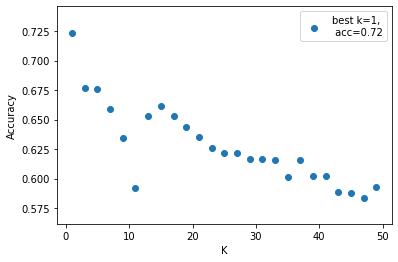

In [29]:
import matplotlib.pyplot as plt
# выбираем только нечетные значения k от 1 до 50
neighbors = np.arange(1, 50, 2)

# сюда мы сложим наши скоры
cv_scores = []

kf = StratifiedKFold(n_splits=7, random_state=42, shuffle=True)

# выполним кросс-валидацию на 7 фолдах со стратификацией,
# в качестве метрики возьмем простое accuracy
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy',)
    cv_scores.append(scores.mean())
    
# отрисуем полученный результат
plt.scatter(neighbors, cv_scores, label='best k={},\n acc={}'.format(neighbors[np.argmax(cv_scores)],
                                                               np.round(max(cv_scores),2)), )
plt.ylabel("Accuracy")
plt.legend()
plt.xlabel("K")
plt.show()

In [30]:
! wget https://github.com/ischurov/math-ml-hse-2018/blob/master/sem04_knn2/sem04_knn2.ipynb -O sem04_legacy.ipynb

--2020-02-06 11:21:10--  https://github.com/ischurov/math-ml-hse-2018/blob/master/sem04_knn2/sem04_knn2.ipynb
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘sem04_legacy.ipynb’

sem04_legacy.ipynb      [ <=>                ]  67,63K  --.-KB/s    in 0,09s   

2020-02-06 11:21:10 (740 KB/s) - ‘sem04_legacy.ipynb’ saved [69252]



## Проклятие размерности

В том проклятье, что для с ростом размерности данных, экспоненциально быстро растёт число данных для обучения моделей для достижения одинакового качества.

Сгенерируем выборку заданного размера.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def mkdata(n, k):
    X = np.random.uniform(low=-1, high=1, size=(n, k))
    y = np.linalg.norm(X, axis=1) ** 2
    return X, y

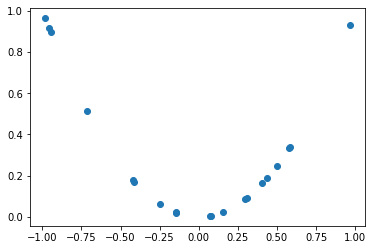

In [35]:
X, y = mkdata(20, 1)
plt.plot(X[:, 0], y, 'o')

Вспомогательная функция для обучения kNN и подсчёта ошибки.

In [36]:
def knn_mse(n, k):
    X_train, y_train = mkdata(n, k)
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    X_test, y_test = mkdata(10000, k)
    return mean_squared_error(knn.predict(X_test), y_test)

Посмотрим на качество модели.

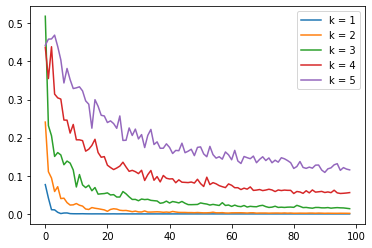

In [37]:
for k in range(1, 6):
    plt.plot([knn_mse(10 * n_, k) for n_ in range(1, 100)], label=f"k = {k}")
plt.legend()

## Обучим kNN на реальных данных

In [49]:
! wget https://raw.githubusercontent.com/ischurov/math-ml-hse-2018/master/sem04_knn2/dataset_31_credit-g.csv

--2020-02-06 11:36:01--  https://raw.githubusercontent.com/ischurov/math-ml-hse-2018/master/sem04_knn2/dataset_31_credit-g.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.36.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.36.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 152006 (148K) [text/plain]
Saving to: ‘dataset_31_credit-g.csv’

dataset_31_credit-g 100%[===================>] 148,44K  70,8KB/s    in 2,1s    

2020-02-06 11:36:04 (70,8 KB/s) - ‘dataset_31_credit-g.csv’ saved [152006/152006]



In [71]:
import pandas as pd

df = pd.read_csv("./dataset_31_credit-g.csv")

In [72]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


Для простоты обработки удалим строковые признаки из датасета.

In [73]:
# YOUR CODE: удалите строковые колонки и закодируйте колонку class нулями и единицами


/home/sorain/anaconda3/envs/sorains_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [74]:
np.unique(y)

array([0, 1])

Посмотрим на точность предсказаний если мы выбираем предсказания всеми единицами.

In [75]:
y_pred = np.ones_like(y)

accuracy_score(y, y_pred)

0.7

Можете сказать вашему менеджеру, что ваш искусственный интеллект умеет предсказывать то, хорош ли клиент для выдачи кредита, с точностью 70%!

На самом деле не всё так просто.

Теперь творческая часть! Подберите несколько алгоритмов kNN так, чтобы качество на кросс-валидации было максимальным.

In [76]:
# YOUR CODE